<a href="https://colab.research.google.com/github/Pathway2008/CarPrice/blob/main/model_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#model_4 의 가격을 어떻게 예측할 것 인가?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [25]:
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 123635 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
train = pd.read_csv('/content/drive/MyDrive/CarPrice/new_car/train.csv')
test = pd.read_csv('/content/drive/MyDrive/CarPrice/new_car/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/CarPrice/new_car/sample_submission.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     4786 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


In [7]:
model_4 = train[train['모델']=='IONIQ'].drop('ID',axis=1).reset_index(drop=True)

In [8]:
model_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   제조사       140 non-null    object 
 1   모델        140 non-null    object 
 2   차량상태      140 non-null    object 
 3   배터리용량     108 non-null    float64
 4   구동방식      140 non-null    object 
 5   주행거리(km)  140 non-null    int64  
 6   보증기간(년)   140 non-null    int64  
 7   사고이력      140 non-null    object 
 8   연식(년)     140 non-null    int64  
 9   가격(백만원)   140 non-null    float64
dtypes: float64(2), int64(3), object(5)
memory usage: 11.1+ KB


In [9]:
model_4.head()

,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,H사,IONIQ,Nearly New,88.08,FWD,43412,3,No,2,27.53
1,H사,IONIQ,Nearly New,75.87,FWD,70822,3,No,0,11.12
2,H사,IONIQ,Pre-Owned,52.78,FWD,76769,1,No,2,12.63
3,H사,IONIQ,Nearly New,48.27,FWD,35242,3,No,2,9.00
4,H사,IONIQ,Nearly New,58.77,FWD,73469,3,No,0,24.04


In [12]:
ordinal_features = ['제조사', '차량상태', '구동방식','사고이력',  '모델']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(model_4[feature])
    model_4[feature] = le.transform(model_4[feature])

In [13]:
model_4.head()

,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,0,0,0,88.08,0,43412,3,0,2,27.53
1,0,0,0,75.87,0,70822,3,0,0,11.12
2,0,0,1,52.78,0,76769,1,0,2,12.63
3,0,0,0,48.27,0,35242,3,0,2,9.00
4,0,0,0,58.77,0,73469,3,0,0,24.04


In [15]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


RMSE 평균: 6.7165
RMSE 분산: 0.5475
SHAP 값 시각화:


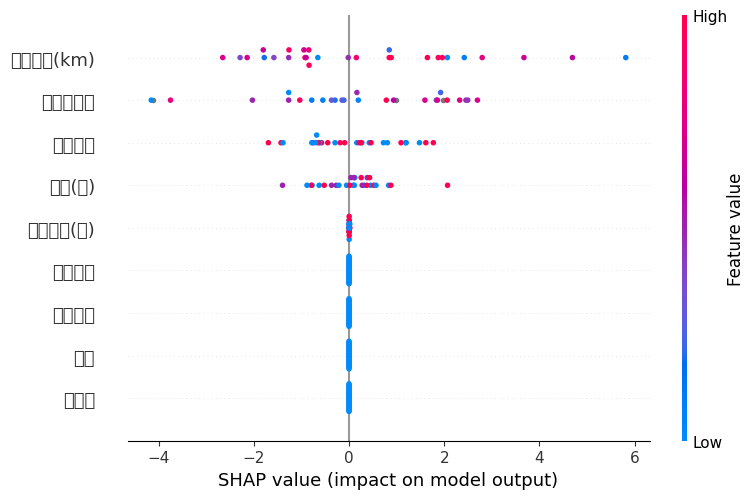

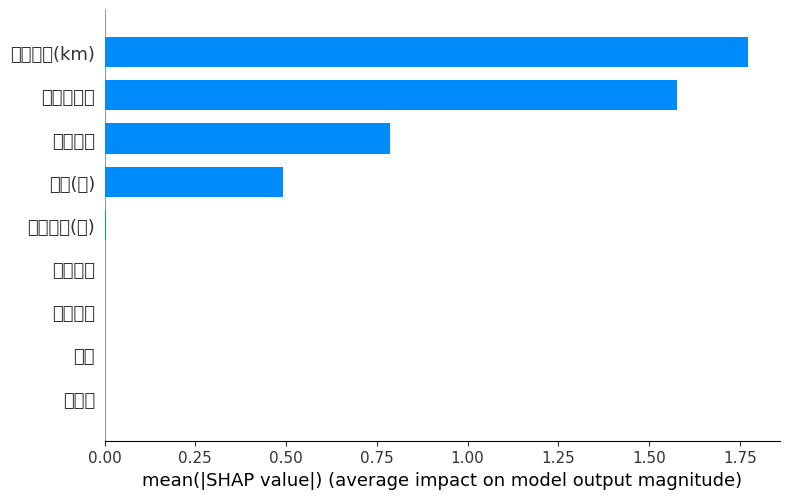

In [24]:
from sklearn.base import RegressorMixin, BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import KFold
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

class SklearnCompatibleRegressor(RegressorMixin, BaseEstimator):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

target = '가격(백만원)'  # 타겟 컬럼 이름
X = model_4.drop(columns=[target])
y = model_4[target]

# KFold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# XGBoost 모델 정의
xgb_params = {
    'n_estimators': 500,
    'learning_rate': 0.05,
    'random_state': 42
}
rmse_list = []
shap_values_list = []
fold_explainer = None  # SHAP Explainer를 한 번만 생성

# 교차 검증
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = xgb.XGBRegressor(**xgb_params)
    model.fit(X_train, y_train)

    # 예측 및 RMSE 계산
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)

    # SHAP 분석 (첫 번째 Fold의 모델을 기준으로 SHAP 분석)
    if fold == 0:
        fold_explainer = shap.TreeExplainer(model)
        shap_values_list = fold_explainer.shap_values(X_test)

# RMSE 결과
mean_rmse = np.mean(rmse_list)
var_rmse = np.var(rmse_list)
print(f"RMSE 평균: {mean_rmse:.4f}")
print(f"RMSE 분산: {var_rmse:.4f}")

SHAP 값 시각화:


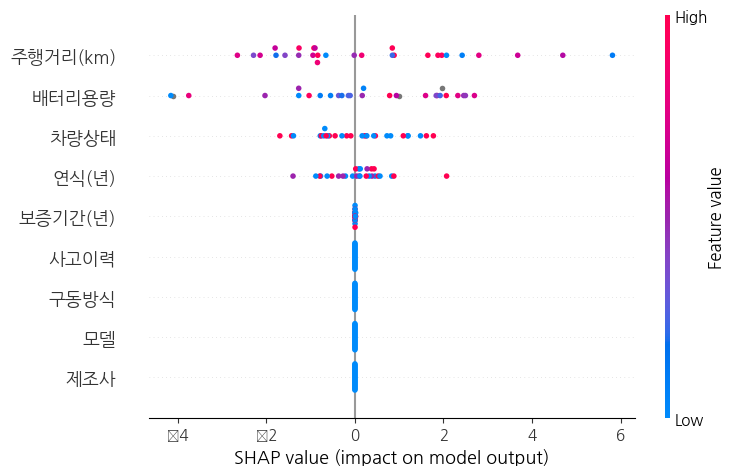

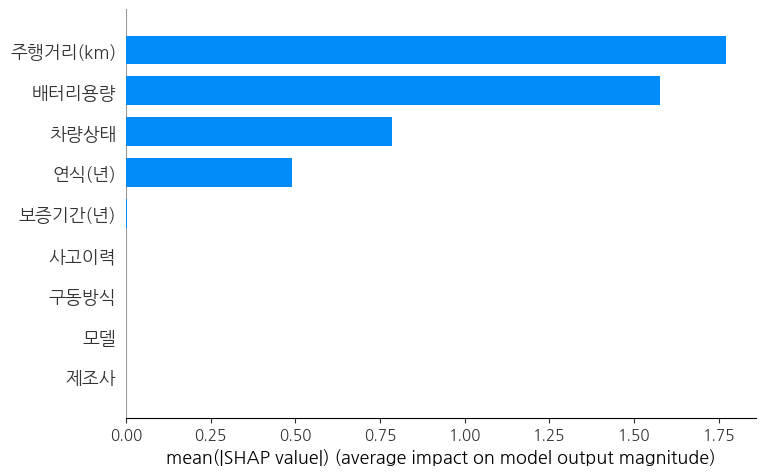

In [26]:
# SHAP 값 시각화
if fold_explainer:
    print("SHAP 값 시각화:")
    # Summary Plot
    shap.summary_plot(shap_values_list, X_test)

    # Feature Importance Plot
    shap.summary_plot(shap_values_list, X_test, plot_type="bar")

In [28]:
model_4['가격(백만원)'].describe()

,가격(백만원)
count,140.000000
mean,17.991500
std,5.421621
min,9.000000
25%,13.110000
50%,17.895000
75%,22.942500
max,27.530000
